In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("cars.csv")
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df.dropna(subset=["horsepower"], inplace=True)

In [3]:
# Specify the comparison reference value as the median of the mpg
mpg_median = df["mpg"].median()

In [4]:
# Create a new column 'efficient' where 1 represents cars with mpg greater or equal to the median
df["efficient"] = (df["mpg"] >= mpg_median).astype(int)

In [5]:
# Define features (the x axis)
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
X = df[features]
y = df["efficient"]

In [6]:
# Manually split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

In [9]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Predict the efficiency on the test data
y_pred = log_reg.predict(X_test)

In [11]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [12]:
# Print out the metrics
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}\n")

Accuracy: 0.8860759493670886

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        42
           1       0.82      0.97      0.89        37

    accuracy                           0.89        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.90      0.89      0.89        79




In [13]:
cm = confusion_matrix(y_test, y_pred)

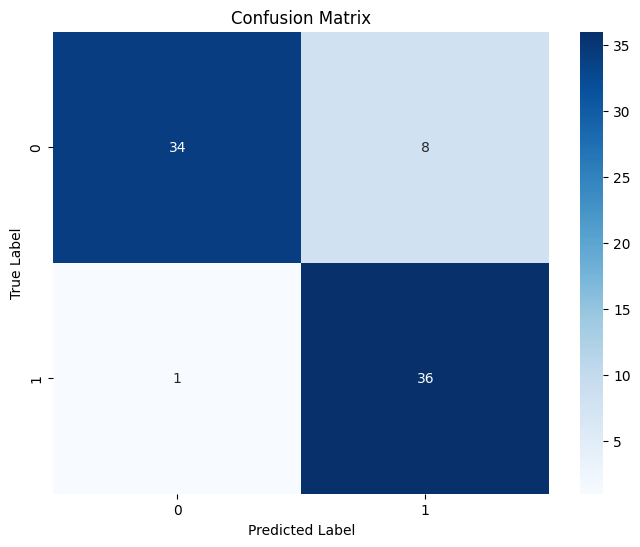

In [14]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()